# Introduction

If you have some background in machine learning and you'd like to learn how to quickly improve the quality of your models, you're in the right place! In this course, you will accelerate your machine learning expertise by learning how to:

* tackle data types often found in real-world datasets (__missing values__, __categorical variables__),
* design __pipelines__ to improve the quality of your machine learning code,
* use advanced techniques for model validation (__cross-validation__),
* build state-of-the-art models that are widely used to win Kaggle competitions (__XGBoost__), and
* avoid common and important data science mistakes (__leakage__).

Along the way, you'll apply your knowledge by completing a hands-on exercise with real-world data for each new topic. The hands-on exercises use data from the [Housing Prices Competition for Kaggle Learn Users](https://www.kaggle.com/c/home-data-for-ml-course), where you'll use 79 different explanatory variables (such as the type of roof, number of bedrooms, and number of bathrooms) to predict home prices. You'll measure your progress by submitting predictions to this competition and watching your position rise on the [leaderboard!](https://www.kaggle.com/c/home-data-for-ml-course/leaderboard)

## Exercise

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

X_full = pd.read_csv("train.csv", index_col="Id")
X_test_full = pd.read_csv("test.csv", index_col="Id")

# Obtain target and predictors
y = X_full.SalePrice
features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF',
            'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
X = X_full[features].copy()
X_test = X_test_full[features].copy()

# Break off validation set from training data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [2]:
X_train.head()

LotArea  YearBuilt  1stFlrSF  2ndFlrSF  FullBath  BedroomAbvGr  \
Id                                                                    
619    11694       2007      1828         0         2             3   
871     6600       1962       894         0         1             2   
93     13360       1921       964         0         1             2   
818    13265       2002      1689         0         2             3   
303    13704       2001      1541         0         2             3   

     TotRmsAbvGrd  
Id                 
619             9  
871             5  
93              5  
818             7  
303             6

In [3]:
from sklearn.ensemble import RandomForestRegressor

# Define the models
model_1 = RandomForestRegressor(n_estimators=50, random_state=0)
model_2 = RandomForestRegressor(n_estimators=100, random_state=0)
model_3 = RandomForestRegressor(n_estimators=100, criterion='absolute_error', random_state=0)
model_4 = RandomForestRegressor(n_estimators=200, min_samples_split=20, random_state=0)
model_5 = RandomForestRegressor(n_estimators=100, max_depth=7, random_state=0)

models = [model_1, model_2, model_3, model_4, model_5]

To select the best model out of the five, we define a function `score_model()` below. This function returns the mean absolute error (MAE) from the validation set. Recall that the best model will obtain the lowest MAE. (To review mean absolute error, [look here](https://www.kaggle.com/code/dansbecker/model-validation/tutorial).)

In [4]:
from sklearn.metrics import mean_absolute_error

# Function for comparing different models
def score_model(model, X_t=X_train, X_v=X_valid, y_t=y_train, y_v=y_valid):
    model.fit(X_t, y_t)
    preds = model.predict(X_v)
    return mean_absolute_error(y_v, preds)

for i in range(0, len(models)):
    mae = score_model(models[i])
    print("Model %d MAE: %d" % (i+1, mae))

Model 1 MAE: 24015
Model 2 MAE: 23740
Model 3 MAE: 23528
Model 4 MAE: 23996
Model 5 MAE: 23706


### Step 1: Evaluate several models

Use the above results to fill in the line below. Which model is the best model? Your answer should be one of `model_1`, `model_2`, `model_3`, `model_4`, or `model_5`.

In [5]:
# Fill in the best model
best_model = model_3

### Step 2: Generate test predictions

Great. You know how to evaluate what makes an accurate model. Now it's time to go through the modeling process and make predictions. In the line below, create a Random Forest model with the variable name `my_model`.

In [6]:
my_model = RandomForestRegressor()

Run the next code cell without changes.  The code fits the model to the training and validation data, and then generates test predictions that are saved to a CSV file.  These test predictions can be submitted directly to the competition!

In [7]:
# Fit the model to the training data
my_model.fit(X, y)

# Generate test predictions
preds_test = my_model.predict(X_test)

# Save predictions in format used for competition scoring
output = pd.DataFrame({'Id': X_test.index,
                       'SalePrice': preds_test})
output.to_csv('submission.csv', index=False)

# Missing Values

## Lecture

There are many ways data can end up with missing values. For example,

* A 2 bedroom house won't include a value for the size of a third bedroom.
* A survey respondent may choose not to share his income.

Most machine learning libraries (including scikit-learn) give an error if you try to build a model using data with missing values. So you'll need to choose one of the strategies below.

__Three Approaches__
1) A Simple Option: Drop Columns with Missing Values

    The simplest option is to drop columns with missing values.
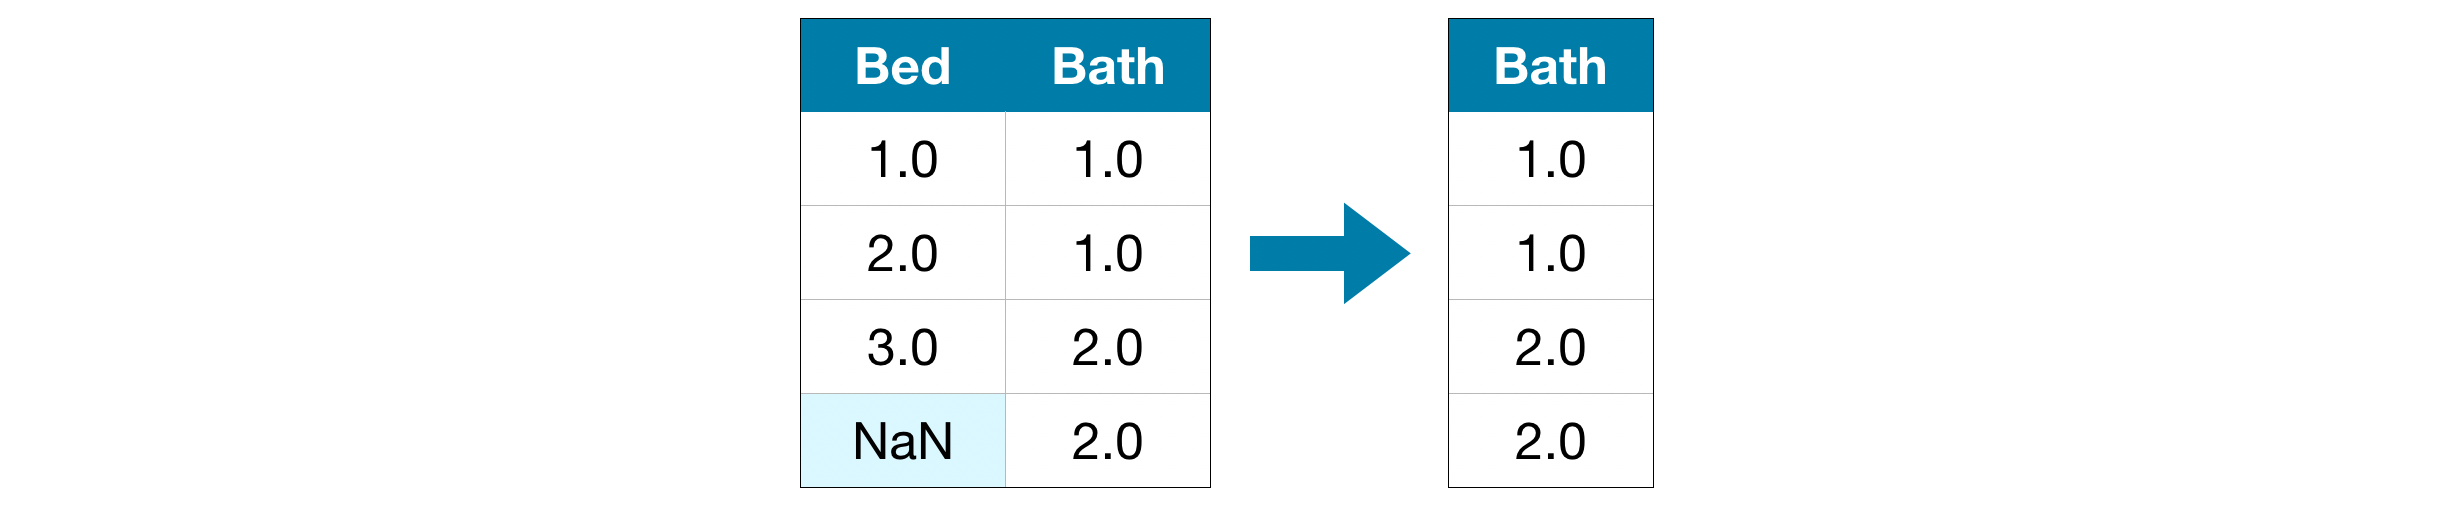
Unless most values in the dropped columns are missing, the model loses access to a lot of (potentially useful!) information with this approach. As an extreme example, consider a dataset with 10,000 rows, where one important column is missing a single entry. This approach would drop the column entirely!

2) A Better Option: Imputation

    Imputation fills in the missing values with some number. For instance, we can fill in the mean value along each column.
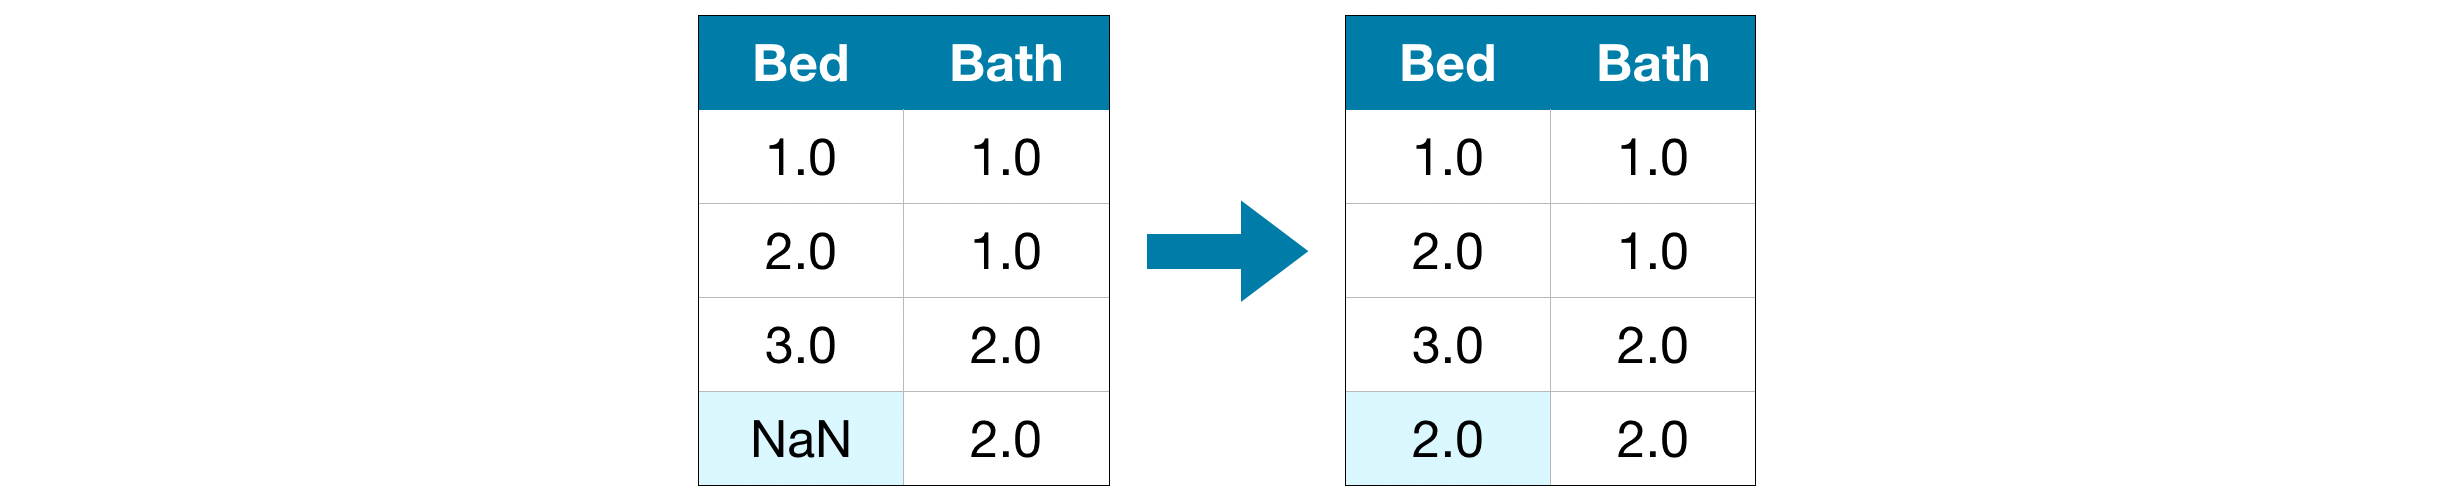
The imputed value won't be exactly right in most cases, but it usually leads to more accurate models than you would get from dropping the column entirely.

3) An Extension To Imputation

Imputation is the standard approach, and it usually works well. However, imputed values may be systematically above or below their actual values (which weren't collected in the dataset). Or rows with missing values may be unique in some other way. In that case, your model would make better predictions by considering which values were originally missing.
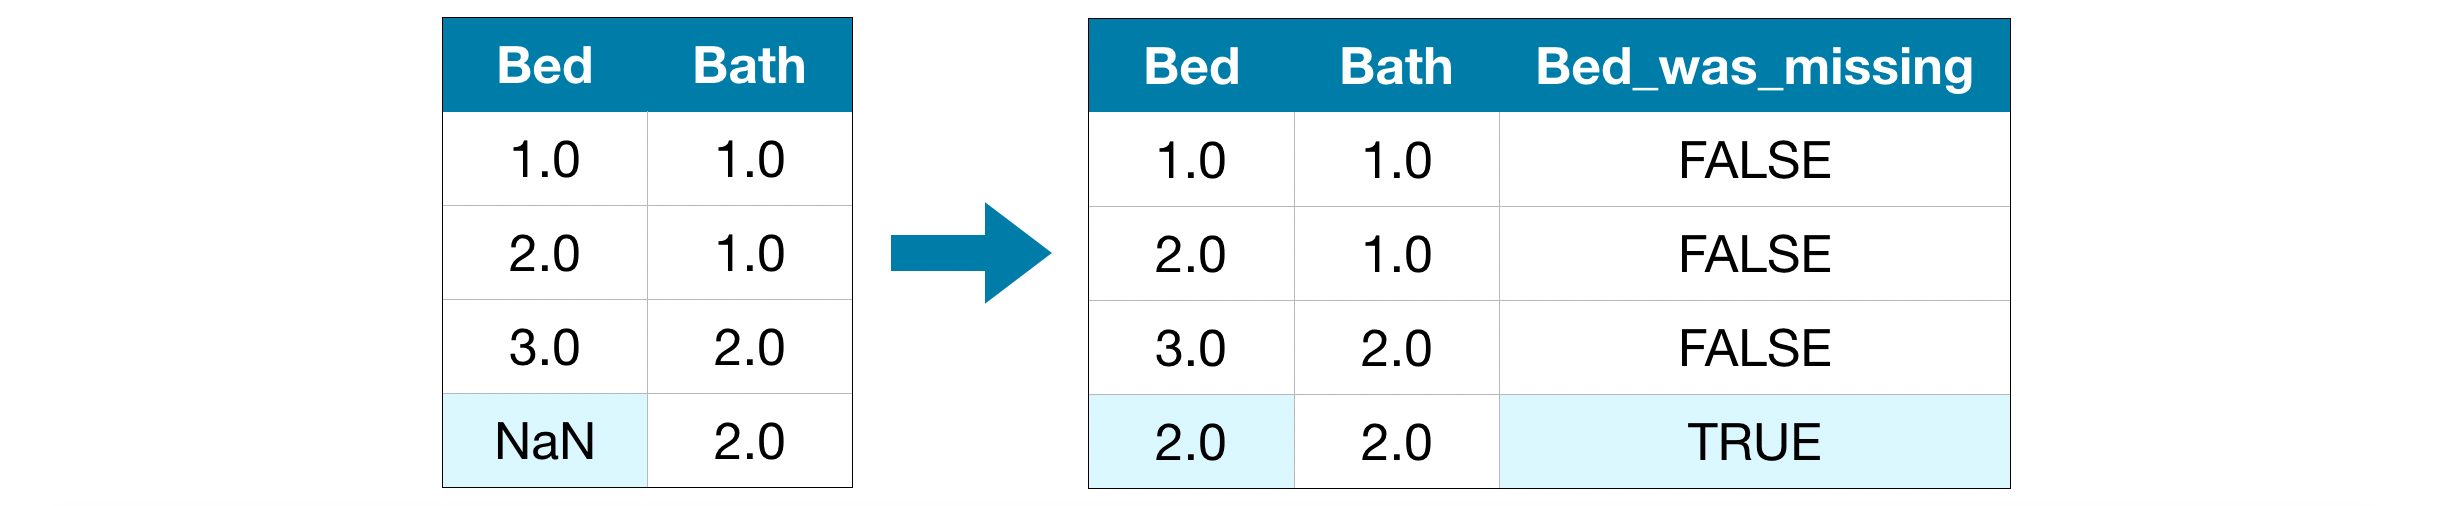

__Example__
In the example, we will work with the Melbourne Housing dataset. Our model will use information such as the number of rooms and land size to predict home price.

We won't focus on the data loading step. Instead, you can imagine you are at a point where you already have the training and validation data in `X_train`, `X_valid`, `y_train`, and `y_valid`.

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the data
data = pd.read_csv("melb_data.csv")

# Select target
y = data.Price

# To keep things simple, we'll use only numerical predictors
melb_predictors = data.drop(['Price'], axis=1)
X = melb_predictors.select_dtypes(exclude=['object'])
X

Rooms  Distance  Postcode  Bedroom2  Bathroom  Car  Landsize  \
0          2       2.5    3067.0       2.0       1.0  1.0     202.0   
1          2       2.5    3067.0       2.0       1.0  0.0     156.0   
2          3       2.5    3067.0       3.0       2.0  0.0     134.0   
3          3       2.5    3067.0       3.0       2.0  1.0      94.0   
4          4       2.5    3067.0       3.0       1.0  2.0     120.0   
...      ...       ...       ...       ...       ...  ...       ...   
13575      4      16.7    3150.0       4.0       2.0  2.0     652.0   
13576      3       6.8    3016.0       3.0       2.0  2.0     333.0   
13577      3       6.8    3016.0       3.0       2.0  4.0     436.0   
13578      4       6.8    3016.0       4.0       1.0  5.0     866.0   
13579      4       6.3    3013.0       4.0       1.0  1.0     362.0   

       BuildingArea  YearBuilt  Lattitude  Longtitude  Propertycount  
0               NaN        NaN  -37.79960   144.99840         4019.0  
1              79.0     1900.0  -37.80790   144.99340         4019.0  
2             150.0     1900.0  -37.80930   144.99440         4019.0  
3               NaN        NaN  -37.79690   144.99690         4019.0  
4             142.0     2014.0  -37.80720   144.99410         4019.0  
...             ...        ...        ...         ...            ...  
13575           NaN     1981.0  -37.90562   145.16761         7392.0  
13576         133.0     1995.0  -37.85927   144.87904         6380.0  
13577           NaN     1997.0  -37.85274   144.88738         6380.0  
13578         157.0     1920.0  -37.85908   144.89299         6380.0  
13579         112.0     1920.0  -37.81188   144.88449         6543.0  

[13580 rows x 12 columns]

In [9]:
# Divide data into training and validation subsets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                      random_state=0)

Define Function to Measure Quality of Each Approach
We define a function score_dataset() to compare different approaches to dealing with missing values. This function reports the mean absolute error (MAE) from a random forest model.

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Function for comparing different approaches
def score_dataset(X_train, X_valid, y_train, y_valid):
    model = RandomForestRegressor(n_estimators=10, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)

### Score from Approach 1 (Drop Columns with Missing Values)

Since we are working with both training and validation sets, we are careful to drop the same columns in both DataFrames.

In [11]:
# Get names of columns with missing values
cols_with_missing = [col for col in X_train.columns
                     if X_train[col].isnull().any()]

cols_with_missing

['Car', 'BuildingArea', 'YearBuilt']

In [12]:
for col in X_train.columns:
    if X_train[col].isnull().any():
        print(col)

Car
BuildingArea
YearBuilt


In [13]:
# Drop columns in training and validation data
reduced_X_train = X_train.drop(cols_with_missing, axis=1)
reduced_X_valid = X_valid.drop(cols_with_missing, axis=1)

print("MAE from Approach 1 (Drop columns with missing values):")
print(score_dataset(reduced_X_train, reduced_X_valid, y_train, y_valid))

MAE from Approach 1 (Drop columns with missing values):
183550.22137772635


### Score from Approach 2 (Imputation)

Next, we use `SimpleImputer` to replace missing values with the mean value along each column.

Although it's simple, filling in the mean value generally performs quite well (but this varies by dataset). While statisticians have experimented with more complex ways to determine imputed values (such as __regression imputation__, for instance), the complex strategies typically give no additional benefit once you plug the results into sophisticated machine learning models.

In [14]:
X_train.head()

Rooms  Distance  Postcode  Bedroom2  Bathroom  Car  Landsize  \
12167      1       5.0    3182.0       1.0       1.0  1.0       0.0   
6524       2       8.0    3016.0       2.0       2.0  1.0     193.0   
8413       3      12.6    3020.0       3.0       1.0  1.0     555.0   
2919       3      13.0    3046.0       3.0       1.0  1.0     265.0   
6043       3      13.3    3020.0       3.0       1.0  2.0     673.0   

       BuildingArea  YearBuilt  Lattitude  Longtitude  Propertycount  
12167           NaN     1940.0  -37.85984    144.9867        13240.0  
6524            NaN        NaN  -37.85800    144.9005         6380.0  
8413            NaN        NaN  -37.79880    144.8220         3755.0  
2919            NaN     1995.0  -37.70830    144.9158         8870.0  
6043          673.0     1970.0  -37.76230    144.8272         4217.0

In [15]:
X_valid.head()

Rooms  Distance  Postcode  Bedroom2  Bathroom  Car  Landsize  \
8505       4       8.0    3016.0       4.0       2.0  2.0     450.0   
5523       2       6.6    3011.0       2.0       1.0  0.0     172.0   
12852      3      10.5    3020.0       3.0       1.0  1.0     581.0   
4818       3       4.5    3181.0       2.0       2.0  1.0     128.0   
12812      3       8.5    3044.0       3.0       2.0  2.0     480.0   

       BuildingArea  YearBuilt  Lattitude  Longtitude  Propertycount  
8505          190.0     1910.0  -37.86100   144.89850         6380.0  
5523           81.0     1900.0  -37.81000   144.88960         2417.0  
12852           NaN        NaN  -37.76740   144.82421         4217.0  
4818          134.0     2000.0  -37.85260   145.00710         7717.0  
12812           NaN        NaN  -37.72523   144.94567         7485.0

In [16]:
from sklearn.impute import SimpleImputer

# Imputation
my_imputer = SimpleImputer()
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(X_train))
imputed_X_valid = pd.DataFrame(my_imputer.transform(X_valid))

In [17]:
# custom test
test = pd.DataFrame(my_imputer.transform(X_train))
test.head()

0     1       2    3    4    5      6           7            8         9   \
0  1.0   5.0  3182.0  1.0  1.0  1.0    0.0  153.764119  1940.000000 -37.85984   
1  2.0   8.0  3016.0  2.0  2.0  1.0  193.0  153.764119  1964.839866 -37.85800   
2  3.0  12.6  3020.0  3.0  1.0  1.0  555.0  153.764119  1964.839866 -37.79880   
3  3.0  13.0  3046.0  3.0  1.0  1.0  265.0  153.764119  1995.000000 -37.70830   
4  3.0  13.3  3020.0  3.0  1.0  2.0  673.0  673.000000  1970.000000 -37.76230   

         10       11  
0  144.9867  13240.0  
1  144.9005   6380.0  
2  144.8220   3755.0  
3  144.9158   8870.0  
4  144.8272   4217.0

In [18]:
imputed_X_train.equals(test)

True

In [19]:
my_imputer.fit_transform(X_train)

array([[ 1.0000000e+00,  5.0000000e+00,  3.1820000e+03, ...,
        -3.7859840e+01,  1.4498670e+02,  1.3240000e+04],
       [ 2.0000000e+00,  8.0000000e+00,  3.0160000e+03, ...,
        -3.7858000e+01,  1.4490050e+02,  6.3800000e+03],
       [ 3.0000000e+00,  1.2600000e+01,  3.0200000e+03, ...,
        -3.7798800e+01,  1.4482200e+02,  3.7550000e+03],
       ...,
       [ 4.0000000e+00,  6.7000000e+00,  3.0580000e+03, ...,
        -3.7735720e+01,  1.4497256e+02,  1.1204000e+04],
       [ 3.0000000e+00,  1.2000000e+01,  3.0730000e+03, ...,
        -3.7720570e+01,  1.4502615e+02,  2.1650000e+04],
       [ 4.0000000e+00,  6.4000000e+00,  3.0110000e+03, ...,
        -3.7794300e+01,  1.4488750e+02,  7.5700000e+03]])

In [20]:
# Imputation removed column names; put them back
imputed_X_train.columns = X_train.columns
imputed_X_valid.columns = X_valid.columns

In [21]:
imputed_X_train.head()

Rooms  Distance  Postcode  Bedroom2  Bathroom  Car  Landsize  BuildingArea  \
0    1.0       5.0    3182.0       1.0       1.0  1.0       0.0    153.764119   
1    2.0       8.0    3016.0       2.0       2.0  1.0     193.0    153.764119   
2    3.0      12.6    3020.0       3.0       1.0  1.0     555.0    153.764119   
3    3.0      13.0    3046.0       3.0       1.0  1.0     265.0    153.764119   
4    3.0      13.3    3020.0       3.0       1.0  2.0     673.0    673.000000   

     YearBuilt  Lattitude  Longtitude  Propertycount  
0  1940.000000  -37.85984    144.9867        13240.0  
1  1964.839866  -37.85800    144.9005         6380.0  
2  1964.839866  -37.79880    144.8220         3755.0  
3  1995.000000  -37.70830    144.9158         8870.0  
4  1970.000000  -37.76230    144.8272         4217.0

In [22]:
imputed_X_valid.head()

Rooms  Distance  Postcode  Bedroom2  Bathroom  Car  Landsize  BuildingArea  \
0    4.0       8.0    3016.0       4.0       2.0  2.0     450.0    190.000000   
1    2.0       6.6    3011.0       2.0       1.0  0.0     172.0     81.000000   
2    3.0      10.5    3020.0       3.0       1.0  1.0     581.0    153.764119   
3    3.0       4.5    3181.0       2.0       2.0  1.0     128.0    134.000000   
4    3.0       8.5    3044.0       3.0       2.0  2.0     480.0    153.764119   

     YearBuilt  Lattitude  Longtitude  Propertycount  
0  1910.000000  -37.86100   144.89850         6380.0  
1  1900.000000  -37.81000   144.88960         2417.0  
2  1964.839866  -37.76740   144.82421         4217.0  
3  2000.000000  -37.85260   145.00710         7717.0  
4  1964.839866  -37.72523   144.94567         7485.0

In [23]:
print("MAE from Approach 2 (Imputation):")
print(score_dataset(imputed_X_train, imputed_X_valid, y_train, y_valid))

MAE from Approach 2 (Imputation):
178166.46269899711


We see that __Approach 2__ has lower MAE than Approach 1, so __Approach 2__ performed better on this dataset.

### Score from Approach 3 (An Extension to Imputation)

Next, we impute the missing values, while also keeping track of which values were imputed.

In [24]:
# Make copy to avoid changing original data (when imputing)
X_train_plus = X_train.copy()
X_valid_plus = X_valid.copy()

In [25]:
cols_with_missing

['Car', 'BuildingArea', 'YearBuilt']

In [26]:
X_train_plus[col].isnull()

12167    False
6524     False
8413     False
2919     False
6043     False
         ...  
13123    False
3264     False
9845     False
10799    False
2732     False
Name: Propertycount, Length: 10864, dtype: bool

In [27]:
# Make new columns indicating what will be imputed
for col in cols_with_missing:
    X_train_plus[col + '_was_missing'] = X_train_plus[col].isnull()
    X_valid_plus[col + '_was_missing'] = X_valid_plus[col].isnull()

In [28]:
X_train_plus.head()

Rooms  Distance  Postcode  Bedroom2  Bathroom  Car  Landsize  \
12167      1       5.0    3182.0       1.0       1.0  1.0       0.0   
6524       2       8.0    3016.0       2.0       2.0  1.0     193.0   
8413       3      12.6    3020.0       3.0       1.0  1.0     555.0   
2919       3      13.0    3046.0       3.0       1.0  1.0     265.0   
6043       3      13.3    3020.0       3.0       1.0  2.0     673.0   

       BuildingArea  YearBuilt  Lattitude  Longtitude  Propertycount  \
12167           NaN     1940.0  -37.85984    144.9867        13240.0   
6524            NaN        NaN  -37.85800    144.9005         6380.0   
8413            NaN        NaN  -37.79880    144.8220         3755.0   
2919            NaN     1995.0  -37.70830    144.9158         8870.0   
6043          673.0     1970.0  -37.76230    144.8272         4217.0   

       Car_was_missing  BuildingArea_was_missing  YearBuilt_was_missing  
12167            False                      True                  False  
6524             False                      True                   True  
8413             False                      True                   True  
2919             False                      True                  False  
6043             False                     False                  False

In [29]:
X_valid_plus.head()

Rooms  Distance  Postcode  Bedroom2  Bathroom  Car  Landsize  \
8505       4       8.0    3016.0       4.0       2.0  2.0     450.0   
5523       2       6.6    3011.0       2.0       1.0  0.0     172.0   
12852      3      10.5    3020.0       3.0       1.0  1.0     581.0   
4818       3       4.5    3181.0       2.0       2.0  1.0     128.0   
12812      3       8.5    3044.0       3.0       2.0  2.0     480.0   

       BuildingArea  YearBuilt  Lattitude  Longtitude  Propertycount  \
8505          190.0     1910.0  -37.86100   144.89850         6380.0   
5523           81.0     1900.0  -37.81000   144.88960         2417.0   
12852           NaN        NaN  -37.76740   144.82421         4217.0   
4818          134.0     2000.0  -37.85260   145.00710         7717.0   
12812           NaN        NaN  -37.72523   144.94567         7485.0   

       Car_was_missing  BuildingArea_was_missing  YearBuilt_was_missing  
8505             False                     False                  False  
5523             False                     False                  False  
12852            False                      True                   True  
4818             False                     False                  False  
12812            False                      True                   True

In [30]:
# Imputation
my_imputer = SimpleImputer()
imputed_X_train_plus = pd.DataFrame(my_imputer.fit_transform(X_train_plus))
imputed_X_valid_plus = pd.DataFrame(my_imputer.transform(X_valid_plus))

# Imputation removed column names; put them back
imputed_X_train_plus.columns = X_train_plus.columns
imputed_X_valid_plus.columns = X_valid_plus.columns

In [31]:
print("MAE from Approach 3 (An Extension to Imputation):")
print(score_dataset(imputed_X_train_plus, imputed_X_valid_plus, y_train, y_valid))

MAE from Approach 3 (An Extension to Imputation):
178927.503183954


As we can see, __Approach 3__ performed slightly worse than __Approach 2__.

__So, why did imputation perform better than dropping the columns?__

The training data has 10864 rows and 12 columns, where three columns contain missing data. For each column, less than half of the entries are missing. Thus, dropping the columns removes a lot of useful information, and so it makes sense that imputation would perform better.

In [32]:
# Shape of training data (num_rows, num_columns)
print(X_train.shape)

(10864, 12)


In [33]:
# Number of missing values in each column of training data
missing_val_count_by_column = (X_train.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Car               49
BuildingArea    5156
YearBuilt       4307
dtype: int64


### Conclusion

As is common, imputing missing values (in __Approach 2__ and __Approach 3__) yielded better results, relative to when we simply dropped columns with missing values (in __Approach 1__).

## Exercise

In this exercise, you will work with data from [the Housing Prices Competition for Kaggle Learn User](https://www.kaggle.com/c/home-data-for-ml-course)

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [35]:
# Read data
X_full = pd.read_csv("train.csv", index_col="Id")
X_test_full = pd.read_csv("test.csv", index_col="Id")

In [36]:
X_full.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [37]:
X_test_full.isna().sum()

MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
Street             0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 79, dtype: int64

In [38]:
# Remove rows with missing target, separate target from predictors
X_full.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = X_full.SalePrice
X_full.drop(['SalePrice'], axis=1, inplace=True)

In [39]:
# To keep things simple, we'll use only numerical predictors
X = X_full.select_dtypes(exclude=['object'])
X_test = X_test_full.select_dtypes(exclude=['object'])

In [40]:
# Break off validation set from training data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8,
                                                      test_size=0.2, 
                                                      random_state=0)

In [41]:
X_train.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
Id                                                                           
619          20         90.0    11694            9            5       2007   
871          20         60.0     6600            5            5       1962   
93           30         80.0    13360            5            7       1921   
818          20          NaN    13265            8            5       2002   
303          20        118.0    13704            7            5       2001   

     YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  GarageArea  \
Id                                                     ...               
619          2007       452.0          48           0  ...         774   
871          1962         0.0           0           0  ...         308   
93           2006         0.0         713           0  ...         432   
818          2002       148.0        1218           0  ...         857   
303          2002       150.0           0           0  ...         843   

     WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
Id                                                                              
619           0          108              0          0          260         0   
871           0            0              0          0            0         0   
93            0            0             44          0            0         0   
818         150           59              0          0            0         0   
303         468           81              0          0            0         0   

     MiscVal  MoSold  YrSold  
Id                            
619        0       7    2007  
871        0       8    2009  
93         0       8    2009  
818        0       7    2008  
303        0       1    2006  

[5 rows x 36 columns]

### Step 1: Preliminary investigation

In [42]:
# Shape of trainning data (num_rows, num_columns)
print(X_train.shape)

# Number of missing values in each column of training data
missing_val_count_by_column = (X_train.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

(1168, 36)
LotFrontage    212
MasVnrArea       6
GarageYrBlt     58
dtype: int64


### Part A

In [43]:
# Fill in the line below: How many rows are in the training data?
num_rows = 1168

# Fill in the line below: How many columns in the training data
# have missing values?
num_cols_with_missing = 3

# Fill in the line below: How many missing entries are contained in 
# all of the training data?
tot_missing = 212+6+58

### Part B

__Considering your answers above, what do you think is likely the best approach to dealing with the missing values?__

__Answer__: Since there are relatively few missing entries in the data (the column with the greatest percentage of missing values is missing less than 20% of its entries), we can expect that dropping columns is unlikely to yield good results. This is because we'd be throwing away a lot of valuable data, and so imputation will likely perform better.

To compare different approaches to dealing with missing values, you'll use the same `score_dataset()` function from the tutorial. This function reports the __mean absolute error__ (MAE) from a random forest model.

In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Function for comparing different approaches
def score_dataset(X_train, X_valid, y_train, y_valid):
    model = RandomForestRegressor(n_estimators=100, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)

### Step 2: Drop columns with missing values

In this step, you'll preprocess the data in `X_train` and `X_valid` to remove columns with missing values. Set the preprocessed DataFrames to `reduced_X_train` and `reduced_X_valid`, respectively.

In [45]:
missed_val_col_train = (X_train.isnull().sum())
missed_val_col_train = missed_val_col_train[missed_val_col_train > 0]
missed_col_train = missed_val_col_train.index

In [46]:
# Fill in the line below: get names of columns with missing values
# For X_train
missed_val_col_train = (X_train.isnull().sum())
missed_col_train = missed_val_col_train[missed_val_col_train > 0].index

# For X_valid
missed_val_col_valid = (X_valid.isnull().sum())
missed_col_valid = missed_val_col_valid[missed_val_col_valid > 0].index


# Fill in the lines below: drop columns in training and validation data
reduced_X_train = X_train.drop(missed_col_train, axis=1)
reduced_X_valid = X_valid.drop(missed_col_valid, axis=1)

In [47]:
print("MAE (Drop columns with missing values):")
print(score_dataset(reduced_X_train, reduced_X_valid, y_train, y_valid))

MAE (Drop columns with missing values):
17837.82570776256


### Step 3: Imputation

#### Part A

Use the next code cell to impute missing values with the mean value along each column. Set the preprocessed DataFrames to `imputed_X_train` and `imputed_X_valid`. Make sure that the column names match those in `X_train` and `X_valid`.

In [48]:
from sklearn.impute import SimpleImputer

# Fill in the lines below: imputation
my_imputer = SimpleImputer()
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(X_train))
imputed_X_valid = pd.DataFrame(my_imputer.transform(X_valid))

# Fill in the lines below: imputation removed column names; put them back
imputed_X_train.columns = X_train.columns
imputed_X_valid.columns = X_train.columns

In [49]:
print("MAE (Imputation):")
print(score_dataset(imputed_X_train, imputed_X_valid, y_train, y_valid))

MAE (Imputation):
18062.894611872147


#### Part B

Compare the MAE from each approach. Does anything surprise you about the results? Why do you think one approach performed better than the other?

__Answer__: Given that there are so few missing values in the dataset, we'd expect imputation to perform better than dropping columns entirely. However, we see that dropping columns performs slightly better! While this can probably partially be attributed to noise in the dataset, another potential explanation is that the imputation method is not a great match to this dataset. That is, maybe instead of filling in the mean value, it makes more sense to set every missing value to a value of 0, to fill in the most frequently encountered value, or to use some other method. For instance, consider the `GarageYrBlt` column (which indicates the year that the garage was built). It's likely that in some cases, a missing value could indicate a house that does not have a garage. Does it make more sense to fill in the median value along each column in this case? Or could we get better results by filling in the minimum value along each column? It's not quite clear what's best in this case, but perhaps we can rule out some options immediately - for instance, setting missing values in this column to 0 is likely to yield horrible results!

### Step 4: Generate test predictions

In this final step, you'll use any approach of your choosing to deal with missing values. Once you've preprocessed the training and validation features, you'll train and evaluate a random forest model. Then, you'll preprocess the test data before generating predictions that can be submitted to the competition!

#### Part A

Use the next code cell to preprocess the training and validation data. Set the preprocessed DataFrames to `final_X_train` and `final_X_valid`. __You can use any approach of your choosing here!__ in order for this step to be marked as correct, you need only ensure:

* the preprocessed DataFrames have the same number of columns,
* the preprocessed DataFrames have no missing values,
* `final_X_train` and `y_train` have the same number of rows, and
* `final_X_valid` and `y_valid` have the same number of rows.

In [50]:
X_train.shape, X_valid.shape

((1168, 36), (292, 36))

In [51]:
# Imputation
final_imputer = SimpleImputer()
final_X_train = pd.DataFrame(final_imputer.fit_transform(X_train))
final_X_valid = pd.DataFrame(final_imputer.transform(X_valid))

final_X_train.columns = X_train.columns
final_X_valid.columns = X_valid.columns

final_X_train.shape, final_X_valid.shape

((1168, 36), (292, 36))

Run the next code cell to train and evaluate a random forest model. (Note that we don't use the `score_dataset()` function above, because we will soon use the trained model to generate test predictions!)

In [52]:
# Define and fit model
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(final_X_train, y_train)

# Get validation predictions and MAE
preds_valid = model.predict(final_X_valid)
print("MAE (Your approach):")
print(mean_absolute_error(y_valid, preds_valid))

MAE (Your approach):
18062.894611872147


#### Part B

Use the next code cell to preprocess your test data. Make sure that you use a method that agrees with how you preprocessed the training and validation data, and set the preprocessed test features to `final_X_test`.

Then, use the preprocessed test features and the trained model to generate test predictions in preds_test.

In order for this step to be marked correct, you need only ensure:

* the preprocessed test DataFrame has no missing values, and
* `final_X_test` has the same number of rows as X_test.

In [53]:
X_test = X_test_full.select_dtypes(exclude='object')

In [54]:
# Fill in the line below: preprocess test data
final_X_test = pd.DataFrame(final_imputer.transform(X_test))

# Fill in the line below: get test predictions
preds_test = model.predict(final_X_test)


/home/htetaunglynn/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


**Save test predictions to file**

```python
output = pd.DataFrame({'Id': X_test.index,
                       'SalePrice': preds_test})
output.to_csv('submission.csv', index=False)
```

In [55]:
output = pd.DataFrame({'Id': X_test.index,
                       'SalePrice': preds_test})
output.to_csv('submission.csv', index=False)

# Categorical Variables

## Lecture

### Introduction

A __categorical__ variable takes only a limited number of values.

* Consider a survey that asks how often you eat breakfast and provides four options: "Never", "Rarely", "Most days", or "Every day". In this case, the data is categorical, because responses fall into a fixed set of categories.
* If people responded to a survey about which what brand of car they owned, the responses would fall into categories like "Honda", "Toyota", and "Ford". In this case, the data is also categorical.

You will get an error if you try to plug these variables into most machine learning models in Python without preprocessing them first. In this tutorial, we'll compare three approaches that you can use to prepare your categorical data.

### Three Approaches

1) Drop Categorical Variables

The easiest approach to dealing with categorical variables is to simply remove them from the dataset. This approach will only work well if the columns did not contain useful information.

2) Ordinal Encoding

__Ordinal encoding__ assigns each unique value to a different integer.

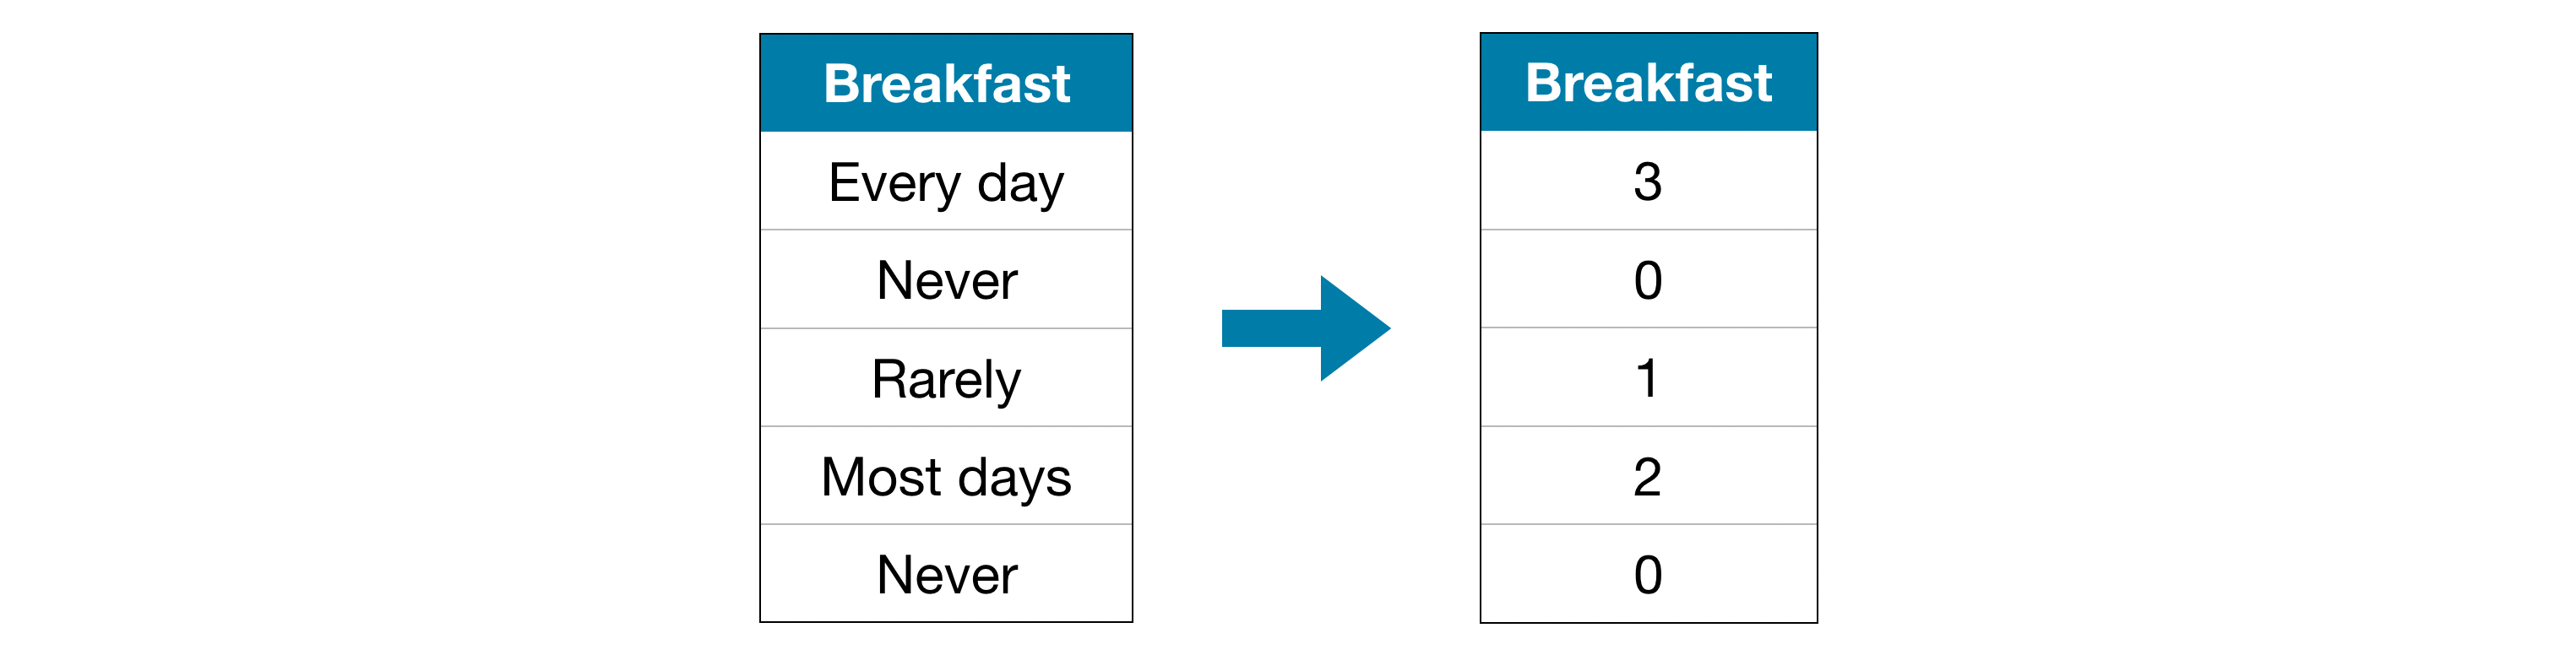

This approach assumes an ordering of the categories: "Never" (0) < "Rarely" (1) < "Most days" (2) < "Every day" (3).

This assumption makes sense in this example, because there is an indisputable ranking to the categories. Not all categorical variables have a clear ordering in the values, but we refer to those that do as __ordinal variables__. For tree-based models (like decision trees and random forests), you can expect ordinal encoding to work well with ordinal variables.

3) One-Hot Encoding

__One-hot encoding__ creates new columns indicating the presence (or absence) of each possible value in the original data. To understand this, we'll work through an example.

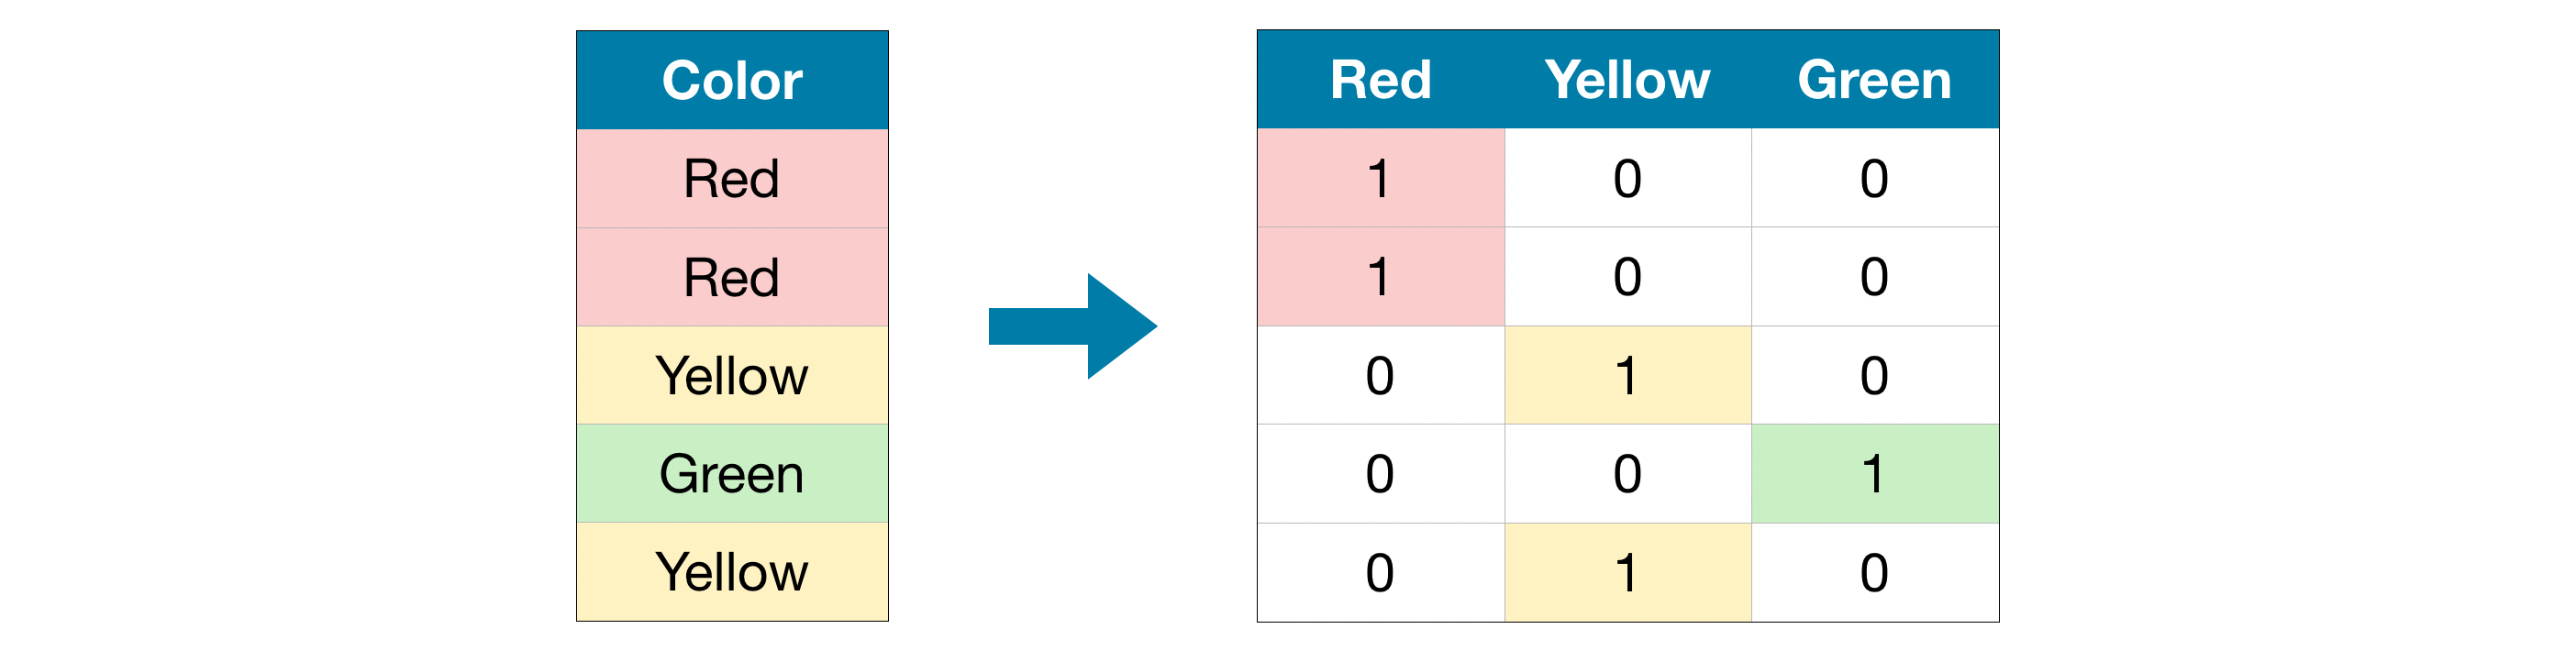

In the original dataset, "Color" is a categorical variable with three categories: "Red", "Yellow", and "Green". The corresponding one-hot encoding contains one column for each possible value, and one row for each row in the original dataset. Wherever the original value was "Red", we put a 1 in the "Red" column; if the original value was "Yellow", we put a 1 in the "Yellow" column, and so on.

In contrast to ordinal encoding, one-hot encoding does not assume an ordering of the categories. Thus, you can expect this approach to work particularly well if there is no clear ordering in the categorical data (e.g., "Red" is neither more nor less than "Yellow"). We refer to categorical variables without an intrinsic ranking as __nominal variables__.

One-hot encoding generally does not perform well if the categorical variable takes on a large number of values (i.e., you generally won't use it for variables taking more than 15 different values).

__Example__
As in the previous tutorial, we will work with the [Melbourne Housing dataset](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot/home).

We won't focus on the data loading step. Instead, you can imagine you are at a point where you already have the training and validation data in X_train, X_valid, y_train, and y_valid.

In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Read data
data = pd.read_csv("melb_data.csv")

# Separate target from predictors
y = data.Price
X = data.drop("Price", axis=1)

In [57]:
# Divide data into training and validation subsets
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8,
                                                               test_size=0.2, random_state=0)

In [58]:
# Drop columns with missing values (simplest approach)
cols_with_missing = [col for col in X_train_full.columns if X_train_full[col].isnull().any()]
print(cols_with_missing)
X_train_full.drop(cols_with_missing, axis=1, inplace=True)
X_valid_full.drop(cols_with_missing, axis=1, inplace=True)

['Car', 'BuildingArea', 'YearBuilt', 'CouncilArea']


In [59]:
# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
low_cardinality_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and 
                       X_train_full[cname].dtype == 'object']
low_cardinality_cols

['Type', 'Method', 'Regionname']

In [60]:
# In depth study
for cname in X_train_full.columns:
    print("col:", cname)
    print("nunique:", X_train_full[cname].nunique())
    print("dtype:", X_train_full[cname].dtype)
    if X_train_full[cname].nunique() < 10 and X_train_full[cname].dtype == 'object':
        print("chose col:", cname)

col: Suburb
nunique: 308
dtype: object
col: Address
nunique: 10742
dtype: object
col: Rooms
nunique: 9
dtype: int64
col: Type
nunique: 3
dtype: object
chose col: Type
col: Method
nunique: 5
dtype: object
chose col: Method
col: SellerG
nunique: 251
dtype: object
col: Date
nunique: 58
dtype: object
col: Distance
nunique: 200
dtype: float64
col: Postcode
nunique: 194
dtype: float64
col: Bedroom2
nunique: 12
dtype: float64
col: Bathroom
nunique: 8
dtype: float64
col: Landsize
nunique: 1353
dtype: float64
col: Lattitude
nunique: 5607
dtype: float64
col: Longtitude
nunique: 6054
dtype: float64
col: Regionname
nunique: 8
dtype: object
chose col: Regionname
col: Propertycount
nunique: 305
dtype: float64


In [61]:
# Select numerical columns
numerical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]
numerical_cols

['Rooms',
 'Distance',
 'Postcode',
 'Bedroom2',
 'Bathroom',
 'Landsize',
 'Lattitude',
 'Longtitude',
 'Propertycount']

In [62]:
# In depth study
for cname in X_train_full.columns:
    print("col:", cname)
    print("dtype:", X_train_full[cname].dtype)
    if X_train_full[cname].dtype in ['int64', 'float64']:
        print("chose col:", cname)

col: Suburb
dtype: object
col: Address
dtype: object
col: Rooms
dtype: int64
chose col: Rooms
col: Type
dtype: object
col: Method
dtype: object
col: SellerG
dtype: object
col: Date
dtype: object
col: Distance
dtype: float64
chose col: Distance
col: Postcode
dtype: float64
chose col: Postcode
col: Bedroom2
dtype: float64
chose col: Bedroom2
col: Bathroom
dtype: float64
chose col: Bathroom
col: Landsize
dtype: float64
chose col: Landsize
col: Lattitude
dtype: float64
chose col: Lattitude
col: Longtitude
dtype: float64
chose col: Longtitude
col: Regionname
dtype: object
col: Propertycount
dtype: float64
chose col: Propertycount


In [63]:
# Keep selected columns only
my_cols = low_cardinality_cols + numerical_cols
print(my_cols)
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()

['Type', 'Method', 'Regionname', 'Rooms', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude', 'Propertycount']


In [64]:
print(X_train.columns)
print(X_valid.columns)

Index(['Type', 'Method', 'Regionname', 'Rooms', 'Distance', 'Postcode',
       'Bedroom2', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude',
       'Propertycount'],
      dtype='object')
Index(['Type', 'Method', 'Regionname', 'Rooms', 'Distance', 'Postcode',
       'Bedroom2', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude',
       'Propertycount'],
      dtype='object')


In [65]:
X_train.head()

Type Method             Regionname  Rooms  Distance  Postcode  Bedroom2  \
12167    u      S  Southern Metropolitan      1       5.0    3182.0       1.0   
6524     h     SA   Western Metropolitan      2       8.0    3016.0       2.0   
8413     h      S   Western Metropolitan      3      12.6    3020.0       3.0   
2919     u     SP  Northern Metropolitan      3      13.0    3046.0       3.0   
6043     h      S   Western Metropolitan      3      13.3    3020.0       3.0   

       Bathroom  Landsize  Lattitude  Longtitude  Propertycount  
12167       1.0       0.0  -37.85984    144.9867        13240.0  
6524        2.0     193.0  -37.85800    144.9005         6380.0  
8413        1.0     555.0  -37.79880    144.8220         3755.0  
2919        1.0     265.0  -37.70830    144.9158         8870.0  
6043        1.0     673.0  -37.76230    144.8272         4217.0

In [66]:
X_valid.head()

Type Method             Regionname  Rooms  Distance  Postcode  Bedroom2  \
8505     h     SP   Western Metropolitan      4       8.0    3016.0       4.0   
5523     h      S   Western Metropolitan      2       6.6    3011.0       2.0   
12852    h     SP   Western Metropolitan      3      10.5    3020.0       3.0   
4818     t     PI  Southern Metropolitan      3       4.5    3181.0       2.0   
12812    h      S  Northern Metropolitan      3       8.5    3044.0       3.0   

       Bathroom  Landsize  Lattitude  Longtitude  Propertycount  
8505        2.0     450.0  -37.86100   144.89850         6380.0  
5523        1.0     172.0  -37.81000   144.88960         2417.0  
12852       1.0     581.0  -37.76740   144.82421         4217.0  
4818        2.0     128.0  -37.85260   145.00710         7717.0  
12812       2.0     480.0  -37.72523   144.94567         7485.0

Next, we obtain a list of all of the categorical variables in the training data.

We do this by checking the data type (or __dtype__) of each column. The object dtype indicates a column has text (there are other things it could theoretically be, but that's unimportant for our purposes). For this dataset, the columns with text indicate categorical variables

In [67]:
# Get list of categorical variables
s = (X_train.dtypes == 'object')
object_cols = list(s[s].index)
object_cols

['Type', 'Method', 'Regionname']

In [68]:
s = (X_train.dtypes == 'object')
list(s[s].index)

['Type', 'Method', 'Regionname']

### Define Function to Measure Quality of Each Approach

We define a function `score_dataset()` to compare the three different approaches to dealing with categorical variables. This function reports the mean absolute error (MAE) from a random forest model. In general, we want the MAE to be as low as possible!

In [69]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Function for comparing different approaches
def score_dataset(X_train, X_valid, y_train, y_valid):
    model = RandomForestRegressor(n_estimators=100, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)

#### Score from Approach 1 (Drop Categorical Variables)

We drop the object columns with the `select_dtypes()` method.

In [70]:
drop_X_train = X_train.select_dtypes(exclude=['object'])
drop_X_valid = X_valid.select_dtypes(exclude=['object'])

In [71]:
print("MAE from Approach 1 (Drop categorical variables):")
print(score_dataset(drop_X_train, drop_X_valid, y_train, y_valid))

MAE from Approach 1 (Drop categorical variables):
175703.48185157913


#### Score from Approach 2 (Ordinal Encoding)

Scikit-learn has a [OrdinalEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html) class that can be used to get ordinal encodings. We loop over the categorical variables and apply the ordinal encoder separately to each column.

In [72]:
from sklearn.preprocessing import OrdinalEncoder

# Make copy to avoid changing original data
label_X_train = X_train.copy()
label_X_valid = X_valid.copy()

In [73]:
X_train["Regionname"].nunique()

8

In [74]:
X_train[object_cols].head()

Type Method             Regionname
12167    u      S  Southern Metropolitan
6524     h     SA   Western Metropolitan
8413     h      S   Western Metropolitan
2919     u     SP  Northern Metropolitan
6043     h      S   Western Metropolitan

In [75]:
X_valid[object_cols].head()

Type Method             Regionname
8505     h     SP   Western Metropolitan
5523     h      S   Western Metropolitan
12852    h     SP   Western Metropolitan
4818     t     PI  Southern Metropolitan
12812    h      S  Northern Metropolitan

In [76]:
# Apply ordinal encoder to each column with categorical data
ordinal_encoder = OrdinalEncoder()
label_X_train[object_cols] = ordinal_encoder.fit_transform(X_train[object_cols])
label_X_valid[object_cols] = ordinal_encoder.transform(X_valid[object_cols])

In [77]:
label_X_train["Regionname"].nunique()

8

In [78]:
label_X_train[object_cols].head()

Type  Method  Regionname
12167   2.0     1.0         5.0
6524    0.0     2.0         6.0
8413    0.0     1.0         6.0
2919    2.0     3.0         2.0
6043    0.0     1.0         6.0

In [79]:
label_X_valid[object_cols].head()

Type  Method  Regionname
8505    0.0     3.0         6.0
5523    0.0     1.0         6.0
12852   0.0     3.0         6.0
4818    1.0     0.0         5.0
12812   0.0     1.0         2.0

In [80]:
print("MAE from Approach 2 (Ordinal Encoding):") 
print(score_dataset(label_X_train, label_X_valid, y_train, y_valid))

MAE from Approach 2 (Ordinal Encoding):
165936.40548390493


In the code cell above, for each column, we randomly assign each unique value to a different integer. This is a common approach that is simpler than providing custom labels; however, we can expect an additional boost in performance if we provide better-informed labels for all ordinal variables.

#### Score from Approach 3 (One-Hot Encoding)

We use the [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) class from scikit-learn to get one-hot encodings. There are a number of parameters that can be used to customize its behavior.

* We set handle_unknown='ignore' to avoid errors when the validation data contains classes that aren't represented in the training data, and
* setting sparse=False ensures that the encoded columns are returned as a numpy array (instead of a sparse matrix).

To use the encoder, we supply only the categorical columns that we want to be one-hot encoded. For instance, to encode the training data, we supply X_train[object_cols]. (object_cols in the code cell below is a list of the column names with categorical data, and so X_train[object_cols] contains all of the categorical data in the training set.)

In [81]:
from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown="ignore", sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[object_cols]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_valid[object_cols]))

/home/htetaunglynn/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [82]:
OH_cols_train.head()

0    1    2    3    4    5    6    7    8    9    10   11   12   13   14  \
0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
1  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   
2  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   
3  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
4  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   

    15  
0  0.0  
1  0.0  
2  0.0  
3  0.0  
4  0.0

In [83]:
# One-hot encoding removed index; put it back
OH_cols_train.index = X_train.index
OH_cols_valid.index = X_valid.index

In [84]:
OH_cols_train.head()

0    1    2    3    4    5    6    7    8    9    10   11   12   13  \
12167  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   
6524   1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
8413   1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2919   0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
6043   1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

        14   15  
12167  0.0  0.0  
6524   1.0  0.0  
8413   1.0  0.0  
2919   0.0  0.0  
6043   1.0  0.0

In [85]:
X_train.head()

Type Method             Regionname  Rooms  Distance  Postcode  Bedroom2  \
12167    u      S  Southern Metropolitan      1       5.0    3182.0       1.0   
6524     h     SA   Western Metropolitan      2       8.0    3016.0       2.0   
8413     h      S   Western Metropolitan      3      12.6    3020.0       3.0   
2919     u     SP  Northern Metropolitan      3      13.0    3046.0       3.0   
6043     h      S   Western Metropolitan      3      13.3    3020.0       3.0   

       Bathroom  Landsize  Lattitude  Longtitude  Propertycount  
12167       1.0       0.0  -37.85984    144.9867        13240.0  
6524        2.0     193.0  -37.85800    144.9005         6380.0  
8413        1.0     555.0  -37.79880    144.8220         3755.0  
2919        1.0     265.0  -37.70830    144.9158         8870.0  
6043        1.0     673.0  -37.76230    144.8272         4217.0

In [86]:
# Remove categorical columns (will replace with one-hot encoding)
num_X_train = X_train.drop(object_cols, axis=1)
num_X_valid = X_valid.drop(object_cols, axis=1)

In [87]:
num_X_train

Rooms  Distance  Postcode  Bedroom2  Bathroom  Landsize  Lattitude  \
12167      1       5.0    3182.0       1.0       1.0       0.0  -37.85984   
6524       2       8.0    3016.0       2.0       2.0     193.0  -37.85800   
8413       3      12.6    3020.0       3.0       1.0     555.0  -37.79880   
2919       3      13.0    3046.0       3.0       1.0     265.0  -37.70830   
6043       3      13.3    3020.0       3.0       1.0     673.0  -37.76230   
...      ...       ...       ...       ...       ...       ...        ...   
13123      3       5.2    3056.0       3.0       1.0     212.0  -37.77695   
3264       3      10.5    3081.0       3.0       1.0     748.0  -37.74160   
9845       4       6.7    3058.0       4.0       2.0     441.0  -37.73572   
10799      3      12.0    3073.0       3.0       1.0     606.0  -37.72057   
2732       4       6.4    3011.0       4.0       2.0     319.0  -37.79430   

       Longtitude  Propertycount  
12167   144.98670        13240.0  
6524    144.90050         6380.0  
8413    144.82200         3755.0  
2919    144.91580         8870.0  
6043    144.82720         4217.0  
...           ...            ...  
13123   144.95785        11918.0  
3264    145.04810         2947.0  
9845    144.97256        11204.0  
10799   145.02615        21650.0  
2732    144.88750         7570.0  

[10864 rows x 9 columns]

In [88]:
# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)

In [89]:
OH_X_train

Rooms  Distance  Postcode  Bedroom2  Bathroom  Landsize  Lattitude  \
12167      1       5.0    3182.0       1.0       1.0       0.0  -37.85984   
6524       2       8.0    3016.0       2.0       2.0     193.0  -37.85800   
8413       3      12.6    3020.0       3.0       1.0     555.0  -37.79880   
2919       3      13.0    3046.0       3.0       1.0     265.0  -37.70830   
6043       3      13.3    3020.0       3.0       1.0     673.0  -37.76230   
...      ...       ...       ...       ...       ...       ...        ...   
13123      3       5.2    3056.0       3.0       1.0     212.0  -37.77695   
3264       3      10.5    3081.0       3.0       1.0     748.0  -37.74160   
9845       4       6.7    3058.0       4.0       2.0     441.0  -37.73572   
10799      3      12.0    3073.0       3.0       1.0     606.0  -37.72057   
2732       4       6.4    3011.0       4.0       2.0     319.0  -37.79430   

       Longtitude  Propertycount    0  ...    6    7    8    9   10   11   12  \
12167   144.98670        13240.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
6524    144.90050         6380.0  1.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
8413    144.82200         3755.0  1.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2919    144.91580         8870.0  0.0  ...  1.0  0.0  0.0  0.0  1.0  0.0  0.0   
6043    144.82720         4217.0  1.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...           ...            ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
13123   144.95785        11918.0  1.0  ...  1.0  0.0  0.0  0.0  1.0  0.0  0.0   
3264    145.04810         2947.0  1.0  ...  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
9845    144.97256        11204.0  1.0  ...  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
10799   145.02615        21650.0  1.0  ...  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
2732    144.88750         7570.0  1.0  ...  1.0  0.0  0.0  0.0  0.0  0.0  0.0   

        13   14   15  
12167  1.0  0.0  0.0  
6524   0.0  1.0  0.0  
8413   0.0  1.0  0.0  
2919   0.0  0.0  0.0  
6043   0.0  1.0  0.0  
...    ...  ...  ...  
13123  0.0  0.0  0.0  
3264   0.0  0.0  0.0  
9845   0.0  0.0  0.0  
10799  0.0  0.0  0.0  
2732   0.0  1.0  0.0  

[10864 rows x 25 columns]

In [90]:
# Ensure all columns have string type
OH_X_train.columns = OH_X_train.columns.astype(str)
OH_X_valid.columns = OH_X_valid.columns.astype(str)

In [91]:
print("MAE from Approach 3 (One-Hot Encoding):") 
print(score_dataset(OH_X_train, OH_X_valid, y_train, y_valid))

MAE from Approach 3 (One-Hot Encoding):
166089.4893009678


### Which approach is the best?

In this case, dropping the categorical columns (__Approach 1__) performed worst, since it had the highest MAE score. As for the other two approaches, since the returned MAE scores are so close in value, there doesn't appear to be any meaningful benefit to one over the other.

In general, one-hot encoding (__Approach 3__) will typically perform best, and dropping the categorical columns (__Approach 1__) typically performs worst, but it varies on a case-by-case basis.

## Exercise

In [92]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [98]:
# Read the data
X = pd.read_csv('train.csv', index_col='Id')
X_test = pd.read_csv('test.csv', index_col='Id')

In [99]:
# Remove rows with missing target, separate target from predictors
X.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = X.SalePrice
X.drop(['SalePrice'], axis=1, inplace=True)

In [100]:
# To keep things simple, we'll drop columns with missing values
cols_with_missing = [col for col in X.columns if X[col].isnull().any()]
print(cols_with_missing)
X.drop(cols_with_missing, axis=1, inplace=True)
X_test.drop(cols_with_missing, axis=1, inplace=True)

['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [96]:
# Break off validation set from training data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, 
                                                      test_size=0.2, random_state=0)

In [101]:
X_train.head()

MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
Id                                                                        
619          20       RL    11694   Pave      Reg         Lvl    AllPub   
871          20       RL     6600   Pave      Reg         Lvl    AllPub   
93           30       RL    13360   Pave      IR1         HLS    AllPub   
818          20       RL    13265   Pave      IR1         Lvl    AllPub   
303          20       RL    13704   Pave      IR1         Lvl    AllPub   

    LotConfig LandSlope Neighborhood  ... OpenPorchSF EnclosedPorch 3SsnPorch  \
Id                                    ...                                       
619    Inside       Gtl      NridgHt  ...         108             0         0   
871    Inside       Gtl        NAmes  ...           0             0         0   
93     Inside       Gtl      Crawfor  ...           0            44         0   
818   CulDSac       Gtl      Mitchel  ...          59             0         0   
303    Corner       Gtl      CollgCr  ...          81             0         0   

    ScreenPorch  PoolArea  MiscVal  MoSold  YrSold SaleType SaleCondition  
Id                                                                         
619         260         0        0       7    2007      New       Partial  
871           0         0        0       8    2009       WD        Normal  
93            0         0        0       8    2009       WD        Normal  
818           0         0        0       7    2008       WD        Normal  
303           0         0        0       1    2006       WD        Normal  

[5 rows x 60 columns]

Notice that the dataset contains both numerical and categorical variables. You'll need to encode the categorical data before training a model.

To compare different models, you'll use the same `score_dataset()` function from the tutorial. This function reports the [mean absolute error (MAE)](https://en.wikipedia.org/wiki/Mean_absolute_error) from a random forest model.

In [103]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# function for comparing different approaches
def score_dataset(X_train, X_valid, y_train, y_valid):
    model = RandomForestRegressor(n_estimators=100, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)

### Step 1: Drop columns with categorical data

You'll get started with the most straightforward approach. Use the code cell below to preprocess the data in `X_train` and `X_valid` to remove columns with categorical data. Set the preprocessed DataFrames to `drop_X_train` and `drop_X_valid`, respectively.

In [117]:
# Fill in the lines below: drop columns in training and validation data
cat_cols = [col for col in X_train.columns if X_train[col].dtypes == 'object']
drop_X_train = X_train.drop(cat_cols, axis=1)
drop_X_valid = X_valid.drop(cat_cols, axis=1)

In [118]:
# Other way
drop_X_train = X_train.select_dtypes(exclude='object')
drop_X_valid = X_valid.select_dtypes(exclude='object')

Run the next code cell to get the MAE for this approach.

In [119]:
print("MAE from Approach 1 (Drop categorical variables):")
print(score_dataset(drop_X_train, drop_X_valid, y_train, y_valid))

MAE from Approach 1 (Drop categorical variables):
17837.82570776256


Before jumping into ordinal encoding, we'll investigate the dataset. Specifically, we'll look at the `'Condition2'` column. The code cell below prints the unique entries in both the training and validation sets.

In [120]:
print("Unique values in 'Condition2' column in training data:", X_train['Condition2'].unique())
print("\nUnique values in 'Condition2' column in validation data:", X_valid['Condition2'].unique())

Unique values in 'Condition2' column in training data: ['Norm' 'PosA' 'Feedr' 'PosN' 'Artery' 'RRAe']

Unique values in 'Condition2' column in validation data: ['Norm' 'RRAn' 'RRNn' 'Artery' 'Feedr' 'PosN']


### Step 2: Ordinal encoding

#### Part A

If you now write code to:
* fit and ordinal encoder to the training data, and then
* use it to transform both the training and validation data

you'll get an error. Can you see why this is the case? (You'll need to use the above output to answer this question.)

In [132]:
X_train_obj = X_train.select_dtypes(include='object')

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
Id                                                                        
619        RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
871        RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
93         RL   Pave      IR1         HLS    AllPub    Inside       Gtl   
818        RL   Pave      IR1         Lvl    AllPub   CulDSac       Gtl   
303        RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
...       ...    ...      ...         ...       ...       ...       ...   
764        RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
836        RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1217       RM   Pave      Reg         Lvl    AllPub    Inside       Gtl   
560        RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
685        RL   Pave      IR2         Lvl    AllPub   CulDSac       Gtl   

     Neighborhood Condition1 Condition2  ... ExterCond Foundation Heating  \
Id                                       ...                                
619       NridgHt       Norm       Norm  ...        TA      PConc    GasA   
871         NAmes       PosN       Norm  ...        TA     CBlock    GasA   
93        Crawfor       Norm       Norm  ...        Gd     BrkTil    GasA   
818       Mitchel       Norm       Norm  ...        TA      PConc    GasA   
303       CollgCr       Norm       Norm  ...        TA      PConc    GasA   
...           ...        ...        ...  ...       ...        ...     ...   
764       NoRidge       Norm       Norm  ...        TA      PConc    GasA   
836        Sawyer       Norm       Norm  ...        TA     CBlock    GasA   
1217       Sawyer       RRAe       Norm  ...        TA       Slab    GasA   
560       Blmngtn       Norm       Norm  ...        TA      PConc    GasA   
685       NoRidge       Norm       Norm  ...        TA      PConc    GasA   

     HeatingQC CentralAir KitchenQual Functional PavedDrive SaleType  \
Id                                                                     
619         Ex          Y          Gd        Typ          Y      New   
871         Gd          N          TA        Typ          Y       WD   
93          Ex          Y          TA        Typ          Y       WD   
818         Ex          Y          Gd        Typ          Y       WD   
303         Ex          Y          Gd        Typ          Y       WD   
...        ...        ...         ...        ...        ...      ...   
764         Ex          Y          Gd        Typ          Y       WD   
836         TA          Y          Gd       Min2          Y       WD   
1217        TA          Y          TA        Typ          Y       WD   
560         Ex          Y          Gd        Typ          Y       WD   
685         Gd          Y          TA        Typ          Y       WD   

     SaleCondition  
Id                  
619        Partial  
871         Normal  
93          Normal  
818         Normal  
303         Normal  
...            ...  
764         Normal  
836         Normal  
1217        Normal  
560         Normal  
685         Normal  

[1168 rows x 27 columns]

In [136]:
from sklearn.preprocessing import OrdinalEncoder
X_train_obj = X_train.select_dtypes(include='object')
X_valid_obj = X_valid.select_dtypes(include='object')
ordinal_encoder = OrdinalEncoder()
X_train_ordinal = ordinal_encoder.fit_transform(X_train_obj)
X_valid_ordinal = ordinal_encoder.transform(X_valid_obj)



ValueError: Found unknown categories ['RRNn', 'RRAn'] in column 9 during transform

Fitting an ordinal encoder to a column in the training data creates a corresponding integer-valued label for each unique value __that appears in the training data__. In the case that the validation data contains values that don't also appear in the training data, the encoder will throw an error, because these values won't have an integer assigned to them. Notice that the `'Condition2'` column in the validation data contains the values `'RRAn'` and `'RRNn'`, but these don't appear in the training data -- thus, if we try to use an ordinal encoder with scikit-learn, the code will throw an error.

This is a common problem that you'll encounter with real-world data, and there are many approaches to fixing this issue. For instance, you can write a custom ordinal encoder to deal with new categories. The simplest approach, however, is to drop the problematic categorical columns.

Run the code cell below to save the problematic columns to a Python list `bad_label_cols`. Likewise, columns that can be safely ordinal encoded are stored in `good_label_cols`.

In [137]:
# Categorical columns in the training data
object_cols = [col for col in X_train.columns if X_train[col].dtype == "object"]

In [138]:
# Columns that can be safely ordinal encoded
good_label_cols = [col for col in object_cols if 
                   set(X_valid[col]).issubset(set(X_train[col]))]

In [152]:
list(set(X_valid['Condition1'])), list(set(X_valid['Condition1']))

(['Artery', 'Feedr', 'RRAe', 'RRAn', 'Norm', 'PosN', 'PosA', 'RRNn'],
 ['Artery', 'Feedr', 'RRAe', 'RRAn', 'Norm', 'PosN', 'PosA', 'RRNn'])

In [184]:
set(X_valid['Condition2']), set(X_train['Condition2'])

({'Artery', 'Feedr', 'Norm', 'PosN', 'RRAn', 'RRNn'},
 {'Artery', 'Feedr', 'Norm', 'PosA', 'PosN', 'RRAe'})

In [180]:
len(object_cols)

27

In [171]:
for i, col in enumerate(object_cols, start=1):
    if set(X_valid[col]).issubset(set(X_train[col])):
        print(f"{i}. {col}")

1. MSZoning
2. Street
3. LotShape
4. LandContour
5. Utilities
6. LotConfig
7. LandSlope
8. Neighborhood
9. Condition1
11. BldgType
12. HouseStyle
13. RoofStyle
15. Exterior1st
16. Exterior2nd
17. ExterQual
18. ExterCond
19. Foundation
20. Heating
21. HeatingQC
22. CentralAir
23. KitchenQual
25. PavedDrive
26. SaleType
27. SaleCondition


In [172]:
# Problematic columns that will be dropped from the dataset
bad_label_cols = list(set(object_cols)-set(good_label_cols))
bad_label_cols

['RoofMatl', 'Condition2', 'Functional']

In [181]:
print('Categorical columns that will be ordinal encoded:', good_label_cols)
print('\nCategorical columns that will be dropped from the dataset:', bad_label_cols)

Categorical columns that will be ordinal encoded: ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'KitchenQual', 'PavedDrive', 'SaleType', 'SaleCondition']

Categorical columns that will be dropped from the dataset: ['RoofMatl', 'Condition2', 'Functional']
